# Decide on activation function
Run several trainings using ReLU, [SELU](https://arxiv.org/pdf/1706.02515.pdf), and [Swish](https://arxiv.org/abs/1710.05941) and compare performance.

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


### Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [3]:
nSplits = 5
patience = 100
maxEpochs = 5

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


### Import data

In [4]:
trainData = BatchYielder(h5py.File(dirLoc + 'train.hdf5', "r+"))

# ReLU

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 12.329s 


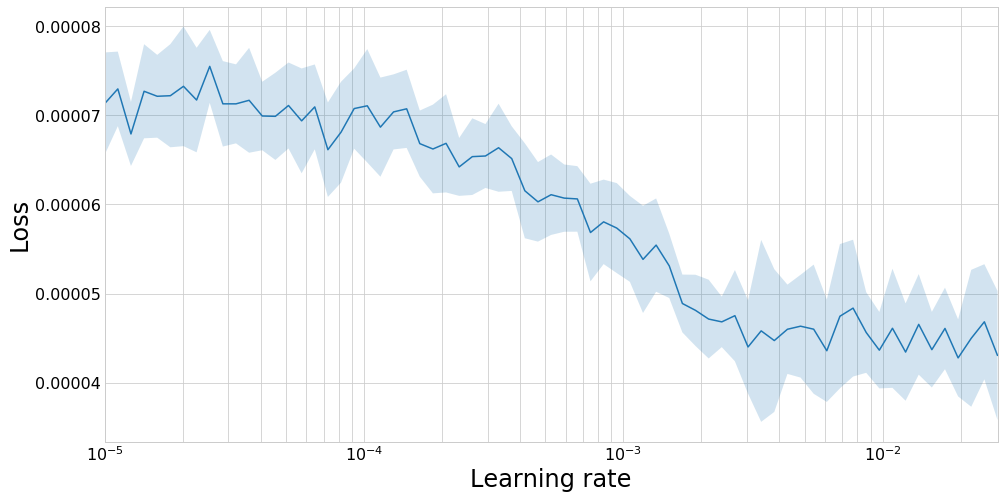

______________________________________



In [5]:
lrFinder = batchLRFind(trainData, getModel, {**modelParams, 'version':'modelRelu'}, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

Training using weights
Running fold 1 / 5
2 classes found, running in binary mode

Score is: {'loss': 3.4177865276511325e-05, 'wAUC': 0.07274537876143061, 'AUC': 0.11803909708525295, 'AMS': 3.372092993714033, 'cut': 0.9294530153274536}
Fold took 32.433s

Running fold 2 / 5
Score is: {'loss': 3.4338497975673835e-05, 'wAUC': 0.0737865100478563, 'AUC': 0.12416438181034195, 'AMS': 3.1658003458884405, 'cut': 0.9223613142967224}
Fold took 28.802s

Running fold 3 / 5
Score is: {'loss': 3.4705846330354086e-05, 'wAUC': 0.0753239693575175, 'AUC': 0.12027943937592778, 'AMS': 3.173402137835804, 'cut': 0.9302384257316589}
Fold took 32.928s

Running fold 4 / 5
Score is: {'loss': 3.327117873268435e-05, 'wAUC': 0.06886853563898565, 'AUC': 0.11581853526241515, 'AMS': 3.4874992534744362, 'cut': 0.943697988986969}
Fold took 33.069s

Running fold 5 / 5
Score is: {'loss': 3.3781592599552824e-05, 'wAUC': 0.07109179397032483, 'AUC': 0.11358787389522018, 'AMS': 3.211007190692205, 'cut': 0.8851180672645569}
Fo

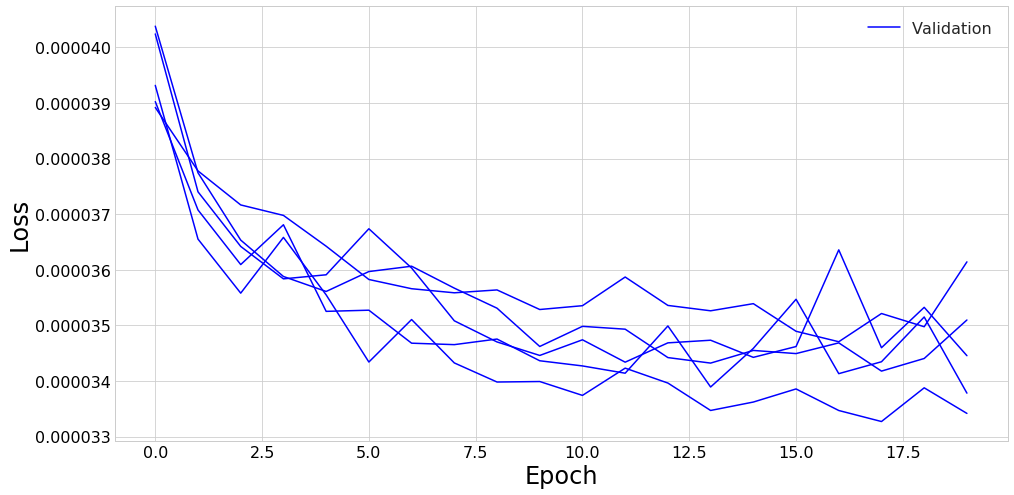

Mean loss = 3.41e-05 +- 2e-07
Mean wAUC = 0.0724 +- 0.001
Mean AUC = 0.118 +- 0.002
Mean AMS = 3.28 +- 0.06
Mean cut = 0.922 +- 0.009
______________________________________



In [8]:
resultsRelu, historiesRelu = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'version':'modelRelu',
                                           'compileArgs':{**compileArgs, 'lr':1e-3}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          patience=patience, verbose=0, amsSize=250000)

# SELU

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 21.081s 


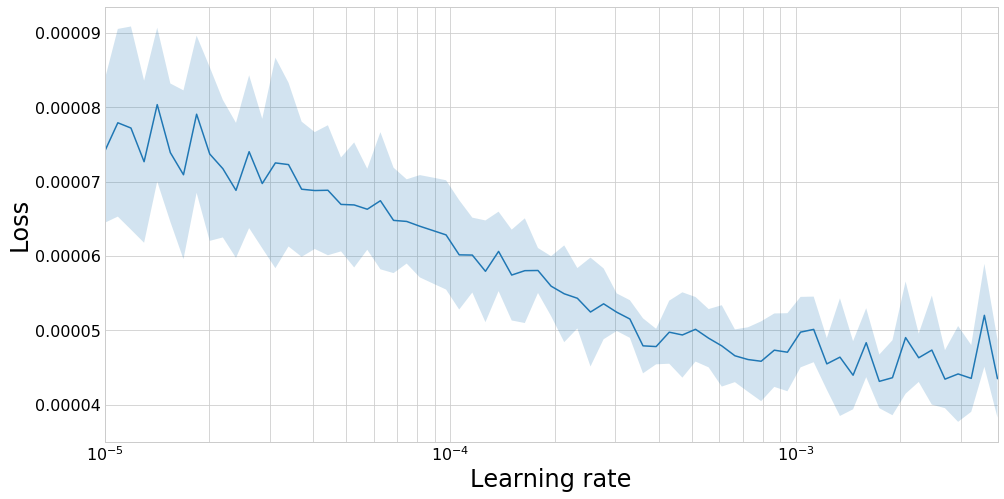

______________________________________



In [6]:
lrFinder = batchLRFind(trainData, getModel, {**modelParams, 'version':'modelSelu'}, trainParams,
                       lrBounds=[1e-5,1e-2], trainOnWeights=True, verbose=0)

Training using weights
Running fold 1 / 5
2 classes found, running in binary mode

Score is: {'loss': 3.4333397078362e-05, 'wAUC': 0.07308608206566425, 'AUC': 0.11819773177656145, 'AMS': 3.5065064661097187, 'cut': 0.9185498952865601}
Fold took 37.697s

Running fold 2 / 5
Score is: {'loss': 3.4473278898713186e-05, 'wAUC': 0.07489360003685319, 'AUC': 0.12467037033795925, 'AMS': 3.2444312442212464, 'cut': 0.9429177045822144}
Fold took 32.271s

Running fold 3 / 5
Score is: {'loss': 3.524229288084728e-05, 'wAUC': 0.07744737704190996, 'AUC': 0.1294587348129037, 'AMS': 3.059724397723601, 'cut': 0.911054790019989}
Fold took 35.420s

Running fold 4 / 5
Score is: {'loss': 3.370642908412265e-05, 'wAUC': 0.0718247949998907, 'AUC': 0.12250866462584742, 'AMS': 2.998640606668495, 'cut': 0.9252356290817261}
Fold took 48.347s

Running fold 5 / 5
Score is: {'loss': 3.441138575435616e-05, 'wAUC': 0.0735513229857937, 'AUC': 0.12106168565888908, 'AMS': 3.082572834563786, 'cut': 0.9407865405082703}
Fold too

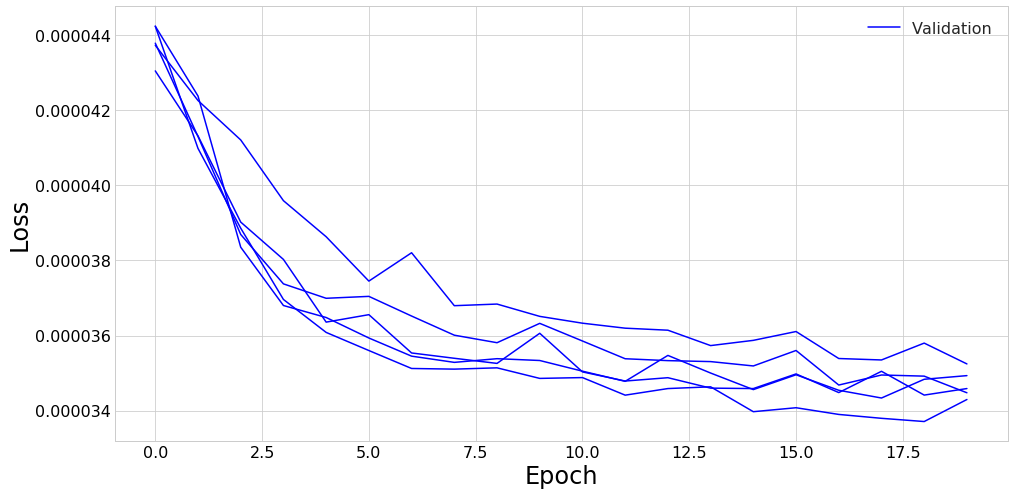

Mean loss = 3.44e-05 +- 2e-07
Mean wAUC = 0.0742 +- 0.0009
Mean AUC = 0.123 +- 0.002
Mean AMS = 3.18 +- 0.08
Mean cut = 0.928 +- 0.006
______________________________________



In [9]:
resultsSelu, historiesSelu = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'version':'modelSelu',
                                           'compileArgs':{**compileArgs, 'lr':3e-4}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          patience=patience, verbose=0, amsSize=250000)

# Swish

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 24.105s 


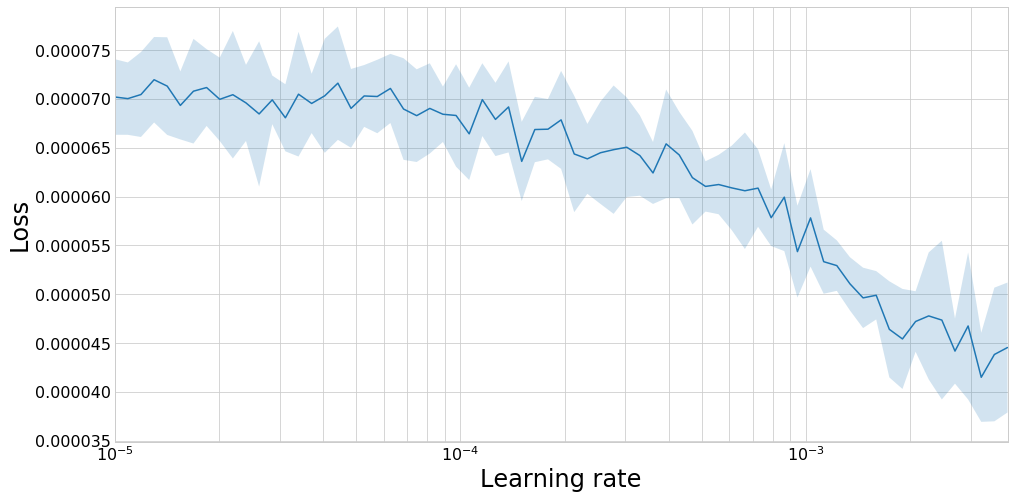

______________________________________



In [7]:
lrFinders = batchLRFind(trainData, getModel, {**modelParams, 'version':'modelSwish'}, trainParams,
                       lrBounds=[1e-5,1e-2], trainOnWeights=True, verbose=0)

Training using weights
Running fold 1 / 5
2 classes found, running in binary mode

Score is: {'loss': 3.356509805974503e-05, 'wAUC': 0.06959528653300318, 'AUC': 0.11177331274189994, 'AMS': 3.579074402190819, 'cut': 0.9452113509178162}
Fold took 43.604s

Running fold 2 / 5
Score is: {'loss': 3.331025281008345e-05, 'wAUC': 0.06923634758444464, 'AUC': 0.11377848766772836, 'AMS': 3.564340233391005, 'cut': 0.9474396705627441}
Fold took 55.846s

Running fold 3 / 5
Score is: {'loss': 3.382380202580473e-05, 'wAUC': 0.07162591969292054, 'AUC': 0.11574136223028209, 'AMS': 3.332600496938113, 'cut': 0.9312201738357544}
Fold took 36.965s

Running fold 4 / 5
Score is: {'loss': 3.2943796071776884e-05, 'wAUC': 0.06835929813451269, 'AUC': 0.10998495618553172, 'AMS': 3.2987224219882045, 'cut': 0.9508064985275269}
Fold took 38.177s

Running fold 5 / 5
Score is: {'loss': 3.3368441634229386e-05, 'wAUC': 0.0696464717277272, 'AUC': 0.11404674944144622, 'AMS': 3.453049344672254, 'cut': 0.9406188130378723}
Fol

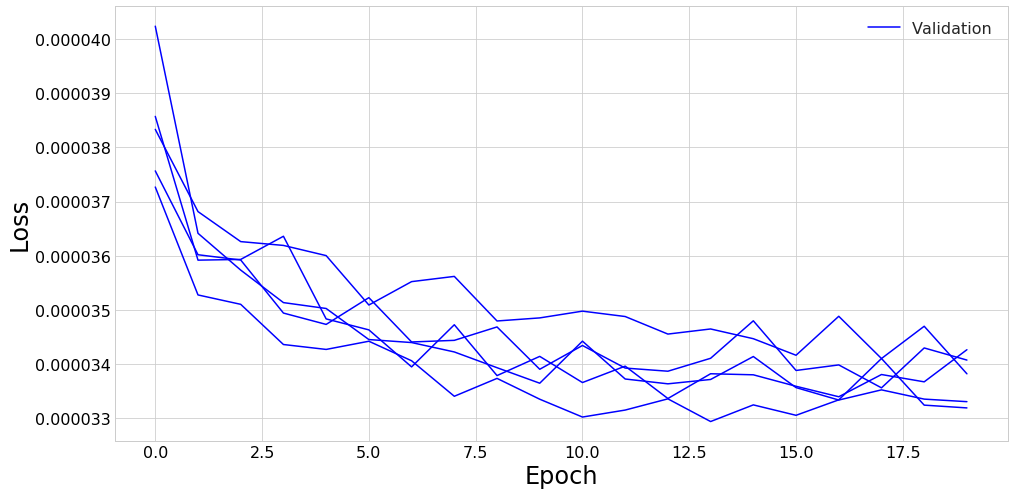

Mean loss = 3.34e-05 +- 1e-07
Mean wAUC = 0.0697 +- 0.0005
Mean AUC = 0.1131 +- 0.0009
Mean AMS = 3.45 +- 0.05
Mean cut = 0.943 +- 0.003
______________________________________



In [10]:
resultsSwish, historiesSwish = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'version':'modelSwish',
                                           'compileArgs':{**compileArgs, 'lr':2e-3}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          patience=patience, verbose=0, amsSize=250000)

From the test, the Swish model appears to show the best performance, reaching a lower loss than both ReLU and SELU, and resulting in a higher AMS.